<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lagrange-Interpolation" data-toc-modified-id="Lagrange-Interpolation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lagrange Interpolation</a></span></li><li><span><a href="#LU-Decomposition" data-toc-modified-id="LU-Decomposition-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LU Decomposition</a></span></li><li><span><a href="#SVD-&amp;-FFT-Compression" data-toc-modified-id="SVD-&amp;-FFT-Compression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>SVD &amp; FFT Compression</a></span><ul class="toc-item"><li><span><a href="#SVD-Method" data-toc-modified-id="SVD-Method-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>SVD Method</a></span><ul class="toc-item"><li><span><a href="#Grayscale-Image" data-toc-modified-id="Grayscale-Image-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Grayscale Image</a></span></li><li><span><a href="#Color-Image" data-toc-modified-id="Color-Image-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Color Image</a></span></li></ul></li><li><span><a href="#FFT-Method" data-toc-modified-id="FFT-Method-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>FFT Method</a></span><ul class="toc-item"><li><span><a href="#Grayscale-Image" data-toc-modified-id="Grayscale-Image-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Grayscale Image</a></span></li><li><span><a href="#Color-Image" data-toc-modified-id="Color-Image-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Color Image</a></span></li></ul></li></ul></li><li><span><a href="#Image-Denoising" data-toc-modified-id="Image-Denoising-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Image Denoising</a></span><ul class="toc-item"><li><span><a href="#SVD-Method" data-toc-modified-id="SVD-Method-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>SVD Method</a></span></li><li><span><a href="#FFT-Method" data-toc-modified-id="FFT-Method-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>FFT Method</a></span></li></ul></li><li><span><a href="#Histogram-matching" data-toc-modified-id="Histogram-matching-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Histogram matching</a></span></li><li><span><a href="#Modified-Gram-Schmidt" data-toc-modified-id="Modified-Gram-Schmidt-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modified Gram-Schmidt</a></span></li></ul></div>

# Lagrange Interpolation

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import math

In [2]:
def Lagrange (Lx, Ly,x):
	est_y=[];
	for i in x:
		y=0
		for k in range ( len(Lx) ):
			t=1
			for j in range ( len(Lx) ):
				if j != k:
					t=t* ((i-Lx[j]) /(Lx[k]-Lx[j]))
			y+= t*Ly[k]
		est_y.append(y)
	return est_y

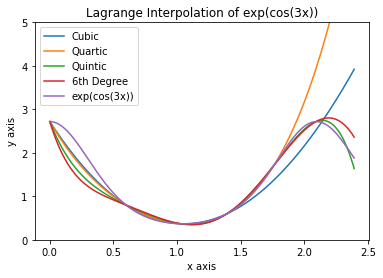

In [3]:
x= np.arange(240)/100;
y=np.exp(np.cos(3*x));

plt.figure()
plt.ylim(0, 5)

Lx=[0,0.6,1.03,1.39]
Ly=[2.718,0.797,0.368,0.597]
cubic_lagr = Lagrange(Lx,Ly,x)
plt.plot(x, cubic_lagr)

Lx=[0,0.6,1.03,1.39,1.76]
Ly=[2.718,0.797,0.368,0.597,1.712]
Quartic_lagr = Lagrange(Lx,Ly,x)
plt.plot(x, Quartic_lagr)

Lx=[0,0.6,1.03,1.39,1.76,2.09]
Ly=[2.718,0.797,0.368,0.597,1.712,2.718]
Quintic_lagr = Lagrange(Lx,Ly,x)
plt.plot(x, Quintic_lagr)

Lx=[0,0.6,1.03,1.39,1.76,2.09,2.29]
Ly=[2.718,0.797,0.368,0.597,1.712,2.718,2.7]
six_deg_lagr = Lagrange(Lx,Ly,x)
plt.plot(x, six_deg_lagr)

plt.plot(x, y)


plt.legend(['Cubic','Quartic','Quintic','6th Degree','exp(cos(3x))']);
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Lagrange Interpolation of exp(cos(3x))')
plt.show()

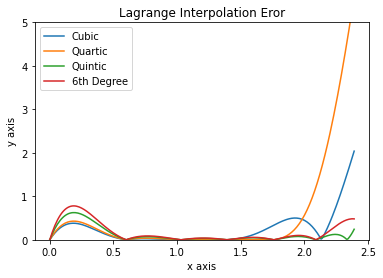

In [4]:
plt.figure()
plt.ylim(0, 5)

plt.plot(x, abs(y-cubic_lagr))
plt.plot(x, abs(y-Quartic_lagr))
plt.plot(x, abs(y-Quintic_lagr))
plt.plot(x, abs(y-six_deg_lagr))

plt.legend(['Cubic','Quartic','Quintic','6th Degree'])
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Lagrange Interpolation Eror')
plt.show()

# LU Decomposition

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def lu(A):
	[r,c] = np.shape(A)
	U = A.astype('float32')
	L = np.eye(r)
	for i in range(r-1):
		fac=U[i+1,i]/U[i,i]
		U[i+1,:]-=fac*U[i]
		L[i+1,i]=fac
	return L, U
H=np.matrix([[1,4,2,3],[3,4,1,7],[0,2,3,4],[0,0,1,3]])
lu(H)

(array([[ 1.       ,  0.       ,  0.       ,  0.       ],
        [ 3.       ,  1.       ,  0.       ,  0.       ],
        [ 0.       , -0.25     ,  1.       ,  0.       ],
        [ 0.       ,  0.       ,  0.5714286,  1.       ]]),
 matrix([[ 1.  ,  4.  ,  2.  ,  3.  ],
         [ 0.  , -8.  , -5.  , -2.  ],
         [ 0.  ,  0.  ,  1.75,  3.5 ],
         [ 0.  ,  0.  ,  0.  ,  1.  ]], dtype=float32))

# SVD & FFT Compression 

In [7]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [8]:
try: 
	img = Image.open(r"C:\Users\asus\Desktop\2\256x256_color\1.tiff").convert('L')
except IOError:
	pass

## SVD Method

### Grayscale Image

In [9]:
def SVD(data, comp):
	U,S,VT=np.linalg.svd(data,full_matrices=False)
	sv_size=len(np.diag(S))
	k=round(sv_size*comp)
	data_comp= np.dot(U[:,:k],np.dot(np.diag(S[:k]),VT[:k,:]))
	return data_comp

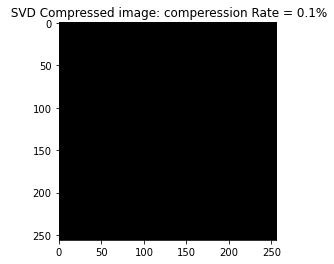

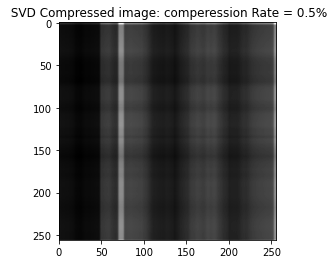

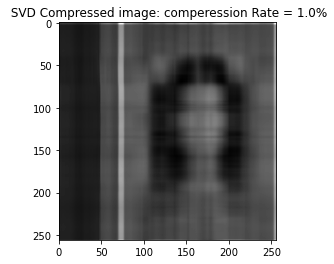

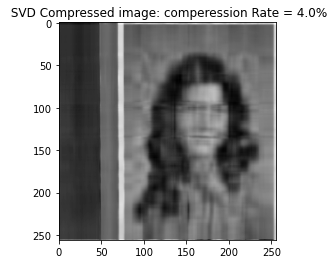

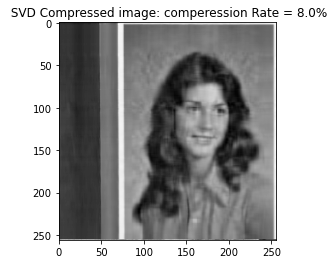

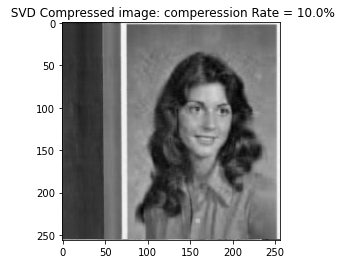

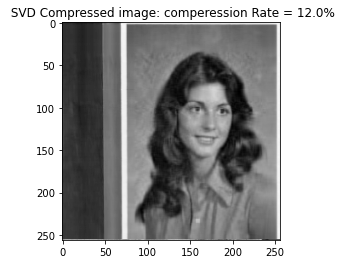

In [10]:
for comp_size in (0.001, 0.005, 0.01, 0.04, 0.08, 0.1,0.12):
	img_comp=SVD(img,comp_size)
	plt.figure()
	plt.imshow(img_comp,cmap='gray');
	plt.title(' SVD Compressed image: comperession Rate = ' + str(comp_size*100)+'%')

### Color Image

In [11]:
try: 
	color_img = np.array(Image.open(r"C:\Users\asus\Desktop\2\256x256_color\1.tiff"))
except IOError:
	pass
img_comp=color_img.copy()

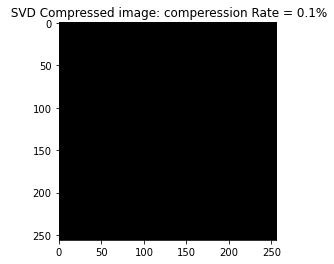

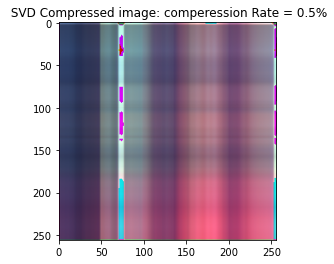

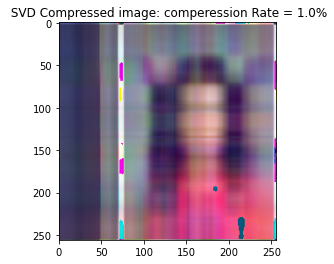

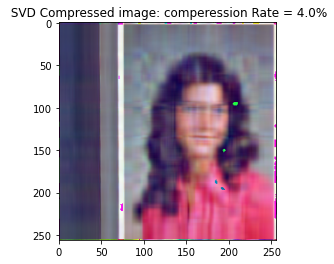

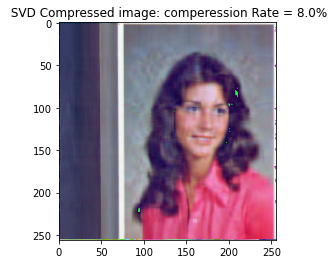

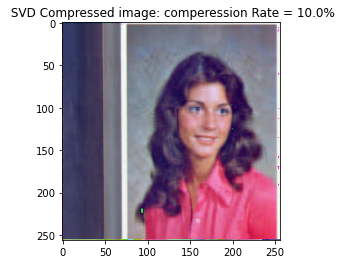

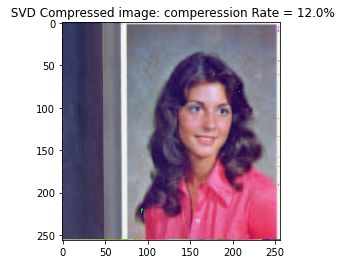

In [12]:
for comp_size in (0.001, 0.005, 0.01, 0.04, 0.08, 0.1,0.12):
	for i in range(3):
		img_comp[:,:,i]=SVD(color_img[:,:,i],comp_size)
	plt.figure()
	plt.imshow(img_comp);
	plt.title(' SVD Compressed image: comperession Rate = ' + str(comp_size*100)+'%')

## FFT Method

### Grayscale Image

In [13]:
def FFT(gray_img,copmp_size):
	fft_img=np.fft.fft2(gray_img)
	fft_img_sort = np.sort(np.abs(fft_img.reshape(-1))) # sort by magnitude
	thresh = fft_img_sort[int(np.floor((1-comp_size)*len(fft_img_sort)))]
	ind = np.abs(fft_img)>thresh          # Find small indices
	Atlow = fft_img * ind                 # Threshold small indices
	Alow = np.fft.ifft2(Atlow).real  # Compressed image
	return Alow

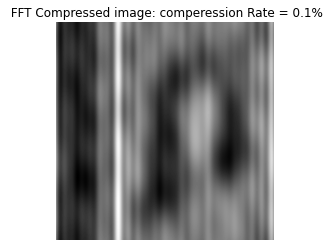

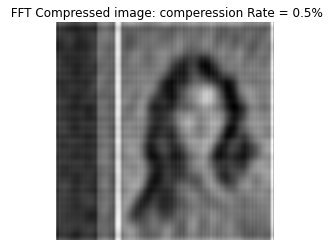

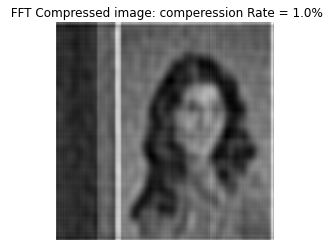

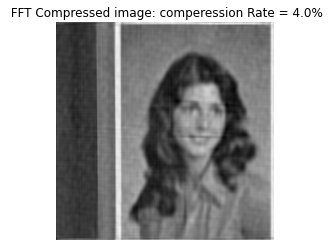

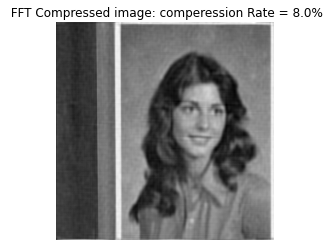

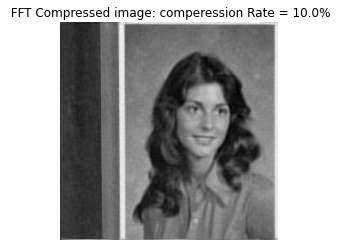

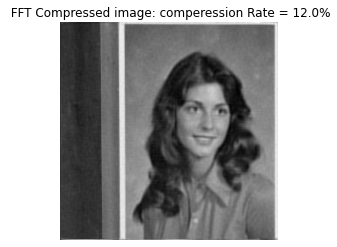

In [14]:
for comp_size in (0.001, 0.005, 0.01, 0.04, 0.08, 0.1,0.12):
	plt.figure()
	plt.imshow(FFT(img,comp_size),cmap='gray')
	plt.axis('off')
	plt.title(' FFT Compressed image: comperession Rate = ' + str(comp_size*100)+'%')

### Color Image

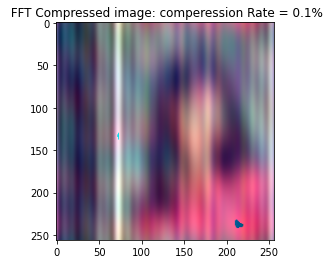

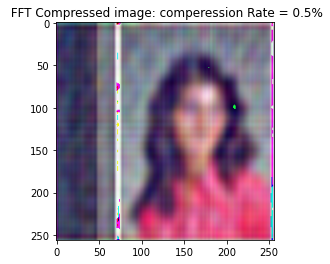

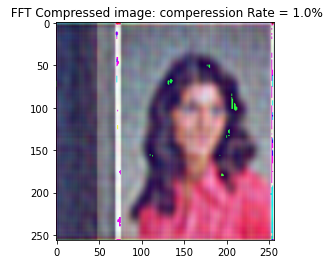

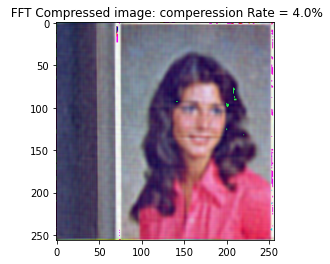

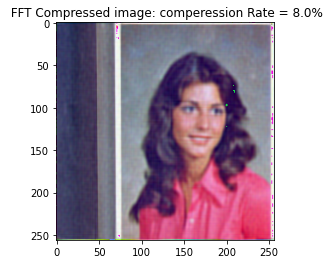

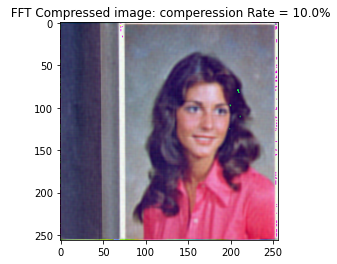

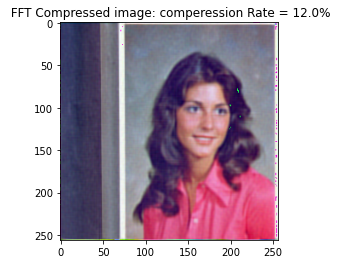

In [15]:
for comp_size in (0.001, 0.005, 0.01, 0.04, 0.08, 0.1,0.12):
	for i in range(3):
		img_comp[:,:,i]=FFT(color_img[:,:,i],comp_size)
	plt.figure()
	plt.imshow(img_comp);
	plt.title(' FFT Compressed image: comperession Rate = ' + str(comp_size*100)+'%')

# Image Denoising

In [16]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

## SVD Method

In [17]:
def SVD_Denoise(filename, rank):
  img = Image.open(filename)
  img = np.asarray(img)
  denoised_img = np.zeros(img.shape)
  for rgb in range(img.shape[2]):
    U, S, V = np.linalg.svd(img[:,:,rgb])
    denoised_img[:,:,rgb] = np.matmul(np.matmul(U[:, :rank] , np.diag(S[:rank])) , V[:rank, :])

  for ind1, row in enumerate(denoised_img):
    for ind2, col in enumerate(row):
      for ind3, value in enumerate(col):
        if value < 0:
          denoised_img[ind1,ind2,ind3] = abs(value)
        if value > 255:
          denoised_img[ind1,ind2,ind3] = 255  
  return denoised_img.astype(np.uint8)

In [18]:
def SVD_plot(filename, ranks):
  fig, axs = plt.subplots(2,3,figsize = (10,10))
  img = Image.open(filename)
  img = np.asarray(img)
  ax = plt.subplot(2,3,1)
  ax.imshow(img)
  ax.set_title('Noisy image')
  ax.axis('off')
  for i in range(len(ranks)):
    denoised_img = SVD_Denoise(filename, ranks[i])
    ax = plt.subplot(2,3,i+2)
    ax.imshow(denoised_img)
    ax.set_title('SVD denoising with rank '+str(ranks[i]))
    ax.axis('off')

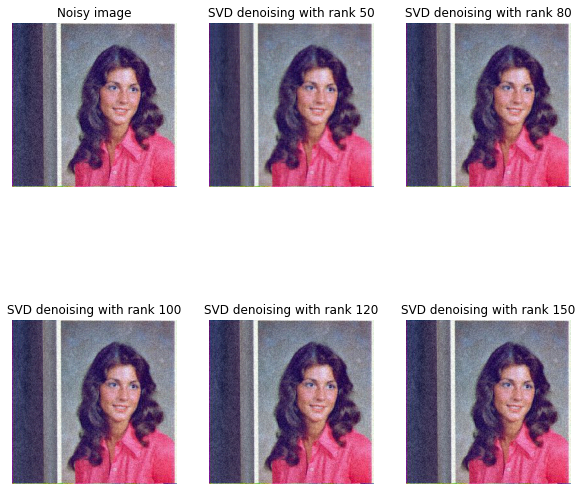

In [19]:
ranks = [50, 80, 100, 120, 150]

SVD_plot(r"C:\Users\asus\Desktop\2\256x256_noisy\1.jpeg", ranks)

## FFT Method

In [20]:
def FFT_Denoise(filename, r):
  img = Image.open(filename)
  img = np.asarray(img)
  denoised_img = np.zeros(img.shape)

  for rgb in range(img.shape[2]):
    fft_img = np.fft.fft2(img[:,:,rgb])
    rows, cols = fft_img.shape
    fft_img[int(rows*r):int(rows*(1-r)),:] = 0
    fft_img[:, int(cols*r):int(cols*(1-r))] = 0
    denoised_img[:,:,rgb] = np.fft.ifft2(fft_img).real

  for ind1, row in enumerate(denoised_img):
    for ind2, col in enumerate(row):
      for ind3, value in enumerate(col):
        if value < 0:
          denoised_img[ind1,ind2,ind3] = abs(value)
        if value > 255:
          denoised_img[ind1,ind2,ind3] = 255  
  return denoised_img.astype(np.uint8)

In [21]:
def FFT_plot(filename, radiuses):
  fig, axs = plt.subplots(2,3,figsize = (10,10))
  img = Image.open(filename)
  img = np.asarray(img)
  ax = plt.subplot(2,3,1)
  ax.imshow(img)
  ax.set_title('Noisy image')
  ax.axis('off')
  for i in range(len(radiuses)):
    denoised_img = FFT_Denoise(filename, radiuses[i])
    ax = plt.subplot(2,3,i+2)
    ax.imshow(denoised_img)
    ax.set_title('FFT denoising with radius '+str(radiuses[i]))
    ax.axis('off')

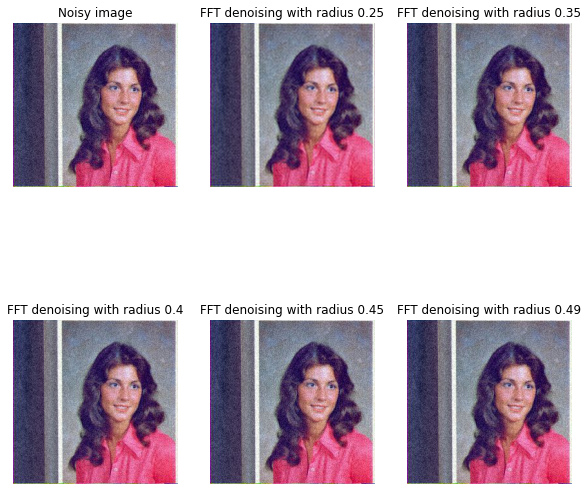

In [22]:
radiuses = [0.25, 0.35, 0.4, 0.45, 0.49]
FFT_plot(r"C:\Users\asus\Desktop\2\256x256_noisy\1.jpeg", radiuses)

# Histogram matching

In [23]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [24]:
def Matching_Histogram(Reference, Source):
  num_bins = 255
  matched_image = Source
  for rgb in range(Source.shape[2]):
    # Calculate CDF of the images:
    ref_CDF, bins = CDF(Reference, rgb, num_bins)
    src_CDF, bins = CDF(Source, rgb, num_bins)
    # Normalizing the CDFs:
    ref_CDF = Normalize(ref_CDF)
    src_CDF = Normalize(src_CDF)
    # Matching the images:
    new_src = np.interp(Source[:,:,rgb].flatten(), bins[:-1], src_CDF)
    changed_src = np.interp(new_src, ref_CDF, bins[:-1])
    matched_image[:,:,rgb] = changed_src.reshape((Source.shape[0],Source.shape[1]))
  return matched_image

In [25]:
def CDF(input, rgb, num_bins):
  Hist, bins = np.histogram(input[:,:,rgb].flatten(), num_bins)
  cdf = np.cumsum(Hist)
  return cdf, bins

def Normalize(input_CDF):
  return (255*input_CDF/input_CDF[-1]).astype(np.uint8)

In [26]:
Reference = np.array(Image.open(r"C:\Users\asus\Desktop\HistogramMatching_images\Reference.jpg"))
Source = np.array(Image.open(r"C:\Users\asus\Desktop\HistogramMatching_images\Source.jpg"))

Matched_Image = Matching_Histogram(Reference, Source)
Matched_Image = Image.fromarray(Matched_Image)

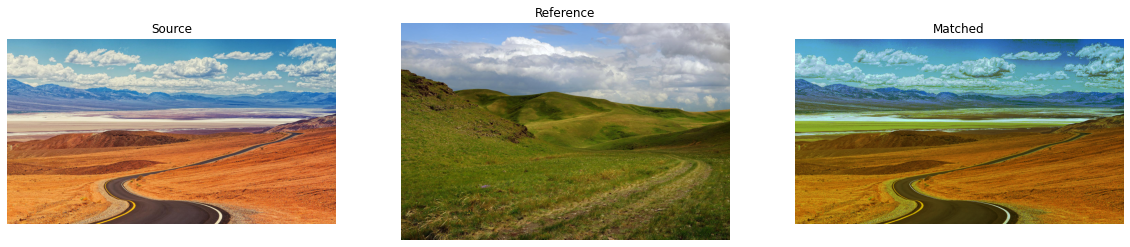

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 3, figsize=(20, 15))
axs[0].imshow(mpimg.imread(r"C:\Users\asus\Desktop\HistogramMatching_images\Source.jpg"))
axs[0].set_title('Source')  # Use `set_title` instead of `title.set_text`
axs[0].axis('off')

axs[1].imshow(mpimg.imread(r"C:\Users\asus\Desktop\HistogramMatching_images\Reference.jpg"))
axs[1].set_title('Reference')  # Use `set_title` instead of `title.set_text`
axs[1].axis('off')

axs[2].imshow(Matched_Image)
axs[2].set_title('Matched')  # Use `set_title` instead of `title.set_text`
axs[2].axis('off')
plt.show()

# Modified Gram-Schmidt

In [33]:
import copy
import numpy as np
from matplotlib import pyplot as plt

In [34]:
def QR(A):
	r, c = A.shape
	Q = np.zeros((r, c),dtype=np.float64) # initialize matrix Q
	u = np.zeros((r, c),dtype=np.float64) # initialize matrix u
	u[:, 0] = copy.copy(A[:, 0])
	Q[:, 0] = u[:, 0] / np.linalg.norm(u[:, 0])
	for i in range(1, c):
		u[:, i] = A[:, i]
		for j in range(i):
			u[:, i] -= np.dot(A[:, i] , Q[:, j]) * Q[:, j] # get each u vector
		Q[:, i] = u[:, i] / np.linalg.norm(u[:, i]) # compute each e vetor
   # QT=np.transpose(Q)
	R = np.zeros((r, c),dtype=np.float64)
	for i in range(n):
		for j in range(i, c):
			R[i, j] = np.dot(A[:, j] , Q[:, i])
    #R=np.matmul(QT,A)
	return Q,R

In [35]:
def QR_Modified_Decomposition(A):
	r, c = A.shape # get the shape of A
	Q = np.zeros((r, c),dtype=np.float64) # initialize matrix Q
   # u = np.zeros((n, m),dtype=np.float64) # initialize matrix u
	R = np.zeros((r, c),dtype=np.float64)
	u = copy.copy(A)
	for i in range(c):
		R[i,i]=np.linalg.norm(u[:, i])
		Q[:, i] = u[:, i] / np.linalg.norm(u[:, i])
		for j in range(i,n):
			R[i,j]= np.dot(Q[:, i] , u[:, j])
			u[:, j] -= (np.dot(Q[:, i] , u[:, j]))* Q[:, i] # get each u vector
	return Q,R

In [36]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))
# set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))
# set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1),dtype=float))
# Set S to a diagonal matrix values between 2−1 and 2−(n+1)
A = np.matmul(U,np.matmul(S,V))
singular_value_A=np.diag(S)

q_Modified,r_Modified=QR_Modified_Decomposition(A)
singular_value_Modified=np.diag(r_Modified)

q_normal,r_normal=QR(A)
singular_value_normal=np.diag(r_normal)

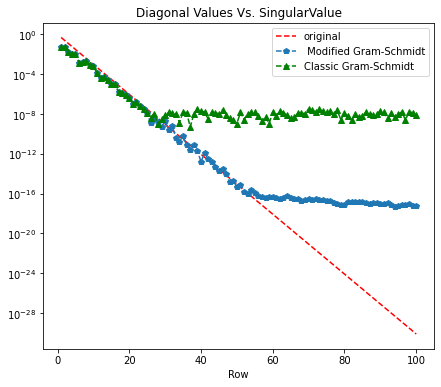

In [39]:
t = np.arange(1, n+1, 1)
plt.figure(figsize=(7, 6))
plt.plot(t, singular_value_A,'r--',t, np.abs(singular_value_Modified), 'p--',t, np.abs(singular_value_normal), 'g--^')
plt.title('Diagonal Values Vs. SingularValue')
plt.yscale('log')
plt.xlabel('Row')
plt.legend(['original',' Modified Gram-Schmidt', 'Classic Gram-Schmidt'])
plt.show()